<a href="https://colab.research.google.com/github/theAkhileshRai/DeepLearning/blob/master/Mnist_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable

In [2]:
train=  pd.read_csv('/content/sample_data/mnist_train_small.csv')
test=  pd.read_csv('/content/sample_data/mnist_test.csv')

In [3]:
train.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.iloc[:,0]

0        5
1        7
2        9
3        5
4        2
        ..
19994    0
19995    1
19996    2
19997    9
19998    5
Name: 6, Length: 19999, dtype: int64

In [5]:
y_train = train.iloc[:,0].values

In [6]:
train.drop(train.columns[0],axis=1,inplace=True)

In [7]:
train = train.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train,y_train , random_state=42,  test_size=0.25,  shuffle=True)

In [9]:
BATCH_SIZE = 32

torch_X_train = torch.from_numpy(X_train).type(torch.LongTensor)
torch_y_train = torch.from_numpy(y_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
torch_X_test = torch.from_numpy(X_test).type(torch.LongTensor)
torch_y_test = torch.from_numpy(y_test).type(torch.LongTensor) # data type is long

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False)

In [10]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(784,250)
        self.linear2 = nn.Linear(250,100)
        self.linear3 = nn.Linear(100,10)

    def forward(self,X):
        X = F.relu(self.linear1(X))
        X = F.relu(self.linear2(X))
        X = self.linear3(X)
        return F.log_softmax(X, dim=1)

mlp = MLP()
print(mlp)

MLP(
  (linear1): Linear(in_features=784, out_features=250, bias=True)
  (linear2): Linear(in_features=250, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
)


In [11]:
def fit(model, train_loader):
    optimizer = torch.optim.Adam(model.parameters())#,lr=0.001, betas=(0.9,0.999))
    error = nn.CrossEntropyLoss()
    EPOCHS = 5
    model.train()
    for epoch in range(EPOCHS):
        correct = 0
        for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
            var_X_batch = Variable(X_batch).float()
            var_y_batch = Variable(y_batch)
            optimizer.zero_grad()
            output = model(var_X_batch)
            loss = error(output, var_y_batch)
            loss.backward()
            optimizer.step()

            # Total correct predictions
            predicted = torch.max(output.data, 1)[1]
            correct += (predicted == var_y_batch).sum()
            #print(correct)
            if batch_idx % 50 == 0:
                print('Epoch : {} Accuracy:{:.3f}%'.format( epoch,  float(correct*100) / float(BATCH_SIZE*(batch_idx+1))))

In [12]:
fit(mlp, train_loader)

Epoch : 0 Accuracy:18.750%
Epoch : 0 Accuracy:67.586%
Epoch : 0 Accuracy:76.207%
Epoch : 0 Accuracy:80.401%
Epoch : 0 Accuracy:82.400%
Epoch : 0 Accuracy:84.039%
Epoch : 0 Accuracy:85.112%
Epoch : 0 Accuracy:85.880%
Epoch : 0 Accuracy:86.526%
Epoch : 0 Accuracy:87.216%
Epoch : 1 Accuracy:93.750%
Epoch : 1 Accuracy:93.505%
Epoch : 1 Accuracy:93.626%
Epoch : 1 Accuracy:93.916%
Epoch : 1 Accuracy:94.201%
Epoch : 1 Accuracy:94.348%
Epoch : 1 Accuracy:94.259%
Epoch : 1 Accuracy:94.168%
Epoch : 1 Accuracy:94.015%
Epoch : 1 Accuracy:94.166%
Epoch : 2 Accuracy:100.000%
Epoch : 2 Accuracy:94.608%
Epoch : 2 Accuracy:94.833%
Epoch : 2 Accuracy:95.426%
Epoch : 2 Accuracy:95.631%
Epoch : 2 Accuracy:95.829%
Epoch : 2 Accuracy:95.453%
Epoch : 2 Accuracy:95.406%
Epoch : 2 Accuracy:95.324%
Epoch : 2 Accuracy:95.399%
Epoch : 3 Accuracy:100.000%
Epoch : 3 Accuracy:96.078%
Epoch : 3 Accuracy:95.947%
Epoch : 3 Accuracy:96.109%
Epoch : 3 Accuracy:96.222%
Epoch : 3 Accuracy:96.290%
Epoch : 3 Accuracy:96.179%

In [13]:
# plt.imshow(train[0].reshape(28,28))
def evaluate(model):
#model = mlp
    correct = 0
    for test_imgs, test_labels in test_loader:
        #print(test_imgs.shape)
        test_imgs = Variable(test_imgs).float()
        output = model(test_imgs)
        predicted = torch.max(output,1)[1]
        correct += (predicted == test_labels).sum()
        # print(predicted)
    print("Test accuracy:{:.3f}% ".format( float(correct) / (len(test_loader)*BATCH_SIZE)))
evaluate(mlp)

Test accuracy:0.938% 


In [14]:
x,y =train[1]

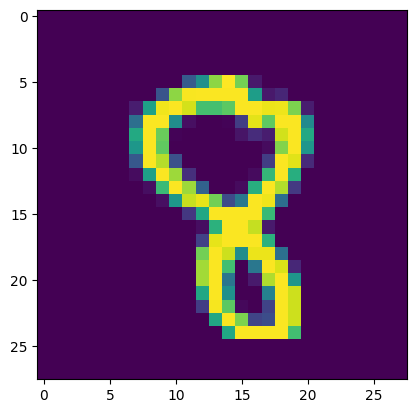

In [15]:
plt.imshow(x.reshape(28,28))
